<a href="https://colab.research.google.com/github/Trinay-prasad/Genarative-AI_2303A52070/blob/main/2303A52070_GenAI_A7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [13]:
y.value_counts()

,count
Outcome,
0,500
1,268


In [14]:
y.count()

768

In [15]:
x.count()

,0
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768


In [16]:
x_train,x_test1,y_train,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test1,y_test1,test_size=0.5,random_state=42)

In [17]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
x_val_scaled=scaler.fit_transform(x_val)

In [18]:
def diabetes_prediction_model(shape):
  model=Sequential()
  model.add(Dense(12,activation='swish',input_shape=(shape,)))
  model.add(Dense(25,activation='swish'))
  model.add(Dense(15,activation='swish'))
  model.add(Dense(1,activation='sigmoid'))
  return model

In [19]:
x_train.shape[1]

8

In [20]:
diabetes_prediction_model =diabetes_prediction_model(x_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
diabetes_prediction_model.compile(optimizer=Adagrad(),loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history=diabetes_prediction_model.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),epochs=300,batch_size=16)

Epoch 1/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6520 - loss: 0.6807 - val_accuracy: 0.5195 - val_loss: 0.6936
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6334 - loss: 0.6799 - val_accuracy: 0.5455 - val_loss: 0.6910
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.6768 - val_accuracy: 0.5714 - val_loss: 0.6886
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - loss: 0.6776 - val_accuracy: 0.5844 - val_loss: 0.6865
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - loss: 0.6758 - val_accuracy: 0.5844 - val_loss: 0.6845
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6433 - loss: 0.6759 - val_accuracy: 0.5714 - val_loss: 0.6826
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - loss: 0.6677 - val_accuracy: 0.5844 - val_loss: 0.6808
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6672 - loss: 0.6704 - val_accuracy: 0.6104 - 

In [23]:
y_pred = (diabetes_prediction_model.predict(x_test_scaled) > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [24]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [25]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision_score}")
print(f"Recall: {recall_score}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.7012987012987013
Precision: <function precision_score at 0x7e5e563bb240>
Recall: <function recall_score at 0x7e5e563bb380>
F1 Score: <function f1_score at 0x7e5e563baa20>


In [26]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.85      0.78        47
           1       0.67      0.47      0.55        30

    accuracy                           0.70        77
   macro avg       0.69      0.66      0.66        77
weighted avg       0.70      0.70      0.69        77



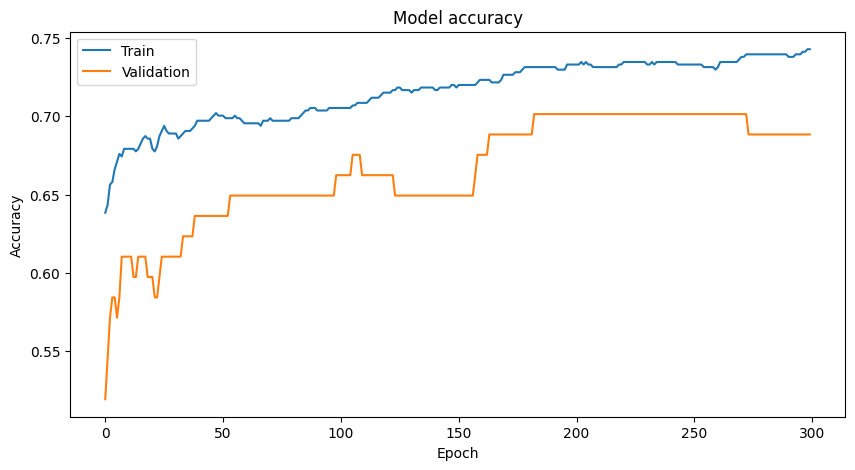

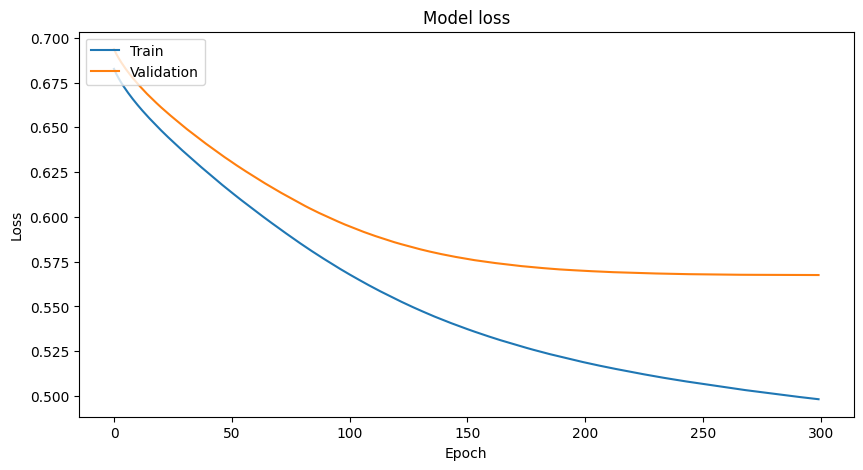

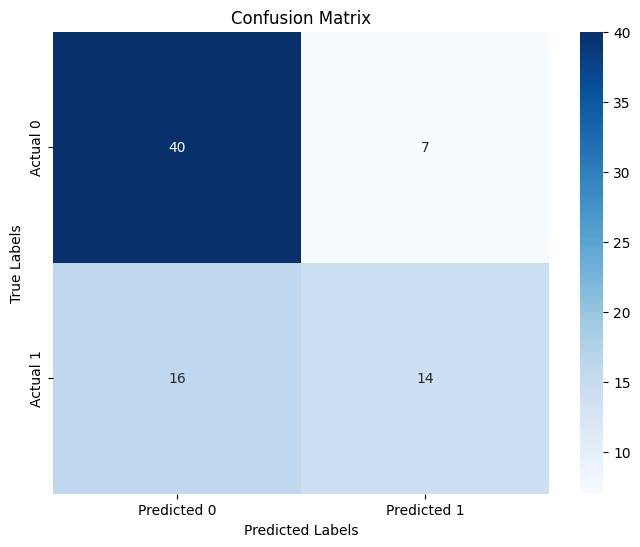

In [27]:
# prompt: genarte graphs fro above metrices

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


print()
print()
print()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print()
print()
print()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()